In [ ]:
# download the data
!wget https://www.cs.cmu.edu/~deva/data/olivettifaces.mat

--2024-01-30 17:02:47--  https://www.cs.cmu.edu/~deva/data/olivettifaces.mat
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4260520 (4.1M)
Saving to: ‘olivettifaces.mat’

olivettifaces.mat   100%[===================>]   4.06M  3.32MB/s    in 1.2s    

2024-01-30 17:02:48 (3.32 MB/s) - ‘olivettifaces.mat’ saved [4260520/4260520]



In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import montage
from PIL import Image
import math

In [ ]:
# Load in matfile; data is a dictionairy object with keys given by variables in matfile
dataMat = scipy.io.loadmat('olivettifaces.mat')
print(type(dataMat), dataMat.keys())

<class 'dict'> dict_keys(['__header__', '__version__', '__globals__', 'faces', 'p', 'u', 'v'])


In [ ]:
# Faces should be a matrix of size [64x64] x n=400 faces
X = dataMat['faces']
print(type(X),X.shape,X.max(),X.min())

<class 'numpy.ndarray'> (4096, 400) 242 0


In [ ]:
imy = 64; imx = 64
n = X.shape[1]
X = X / 255

In [ ]:
# Create montage of faces
plt.figure(figsize=(20,20), dpi=95) # better display with larger figure
plt.imshow(montage(X.reshape(imy,imx,n).transpose(2,1,0)) , cmap='gray')
plt.axis('off')
#fig.savefig('faces.jpg', bbox_inches='tight')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Compute "narrow" SVD with min(m,n) singular values
U, s, Vh = np.linalg.svd(X, full_matrices=False)
print(U.shape, s.shape, Vh.shape)

(4096, 400) (400,) (400, 400)


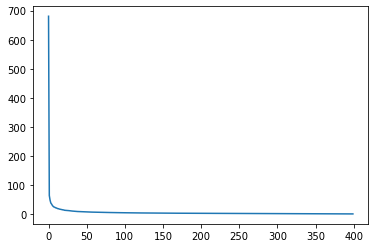

In [ ]:
# Plot singular values
plt.figure()
plt.plot(s)

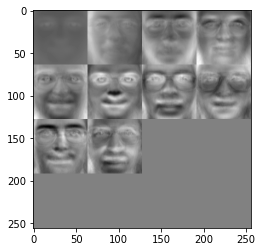

In [ ]:
# Plot first K=9 eigenvectors
K  = 10
plt.figure()
plt.imshow( montage(U[:,:K].reshape(imy,imx,K).transpose(2,1,0)) , cmap='gray')

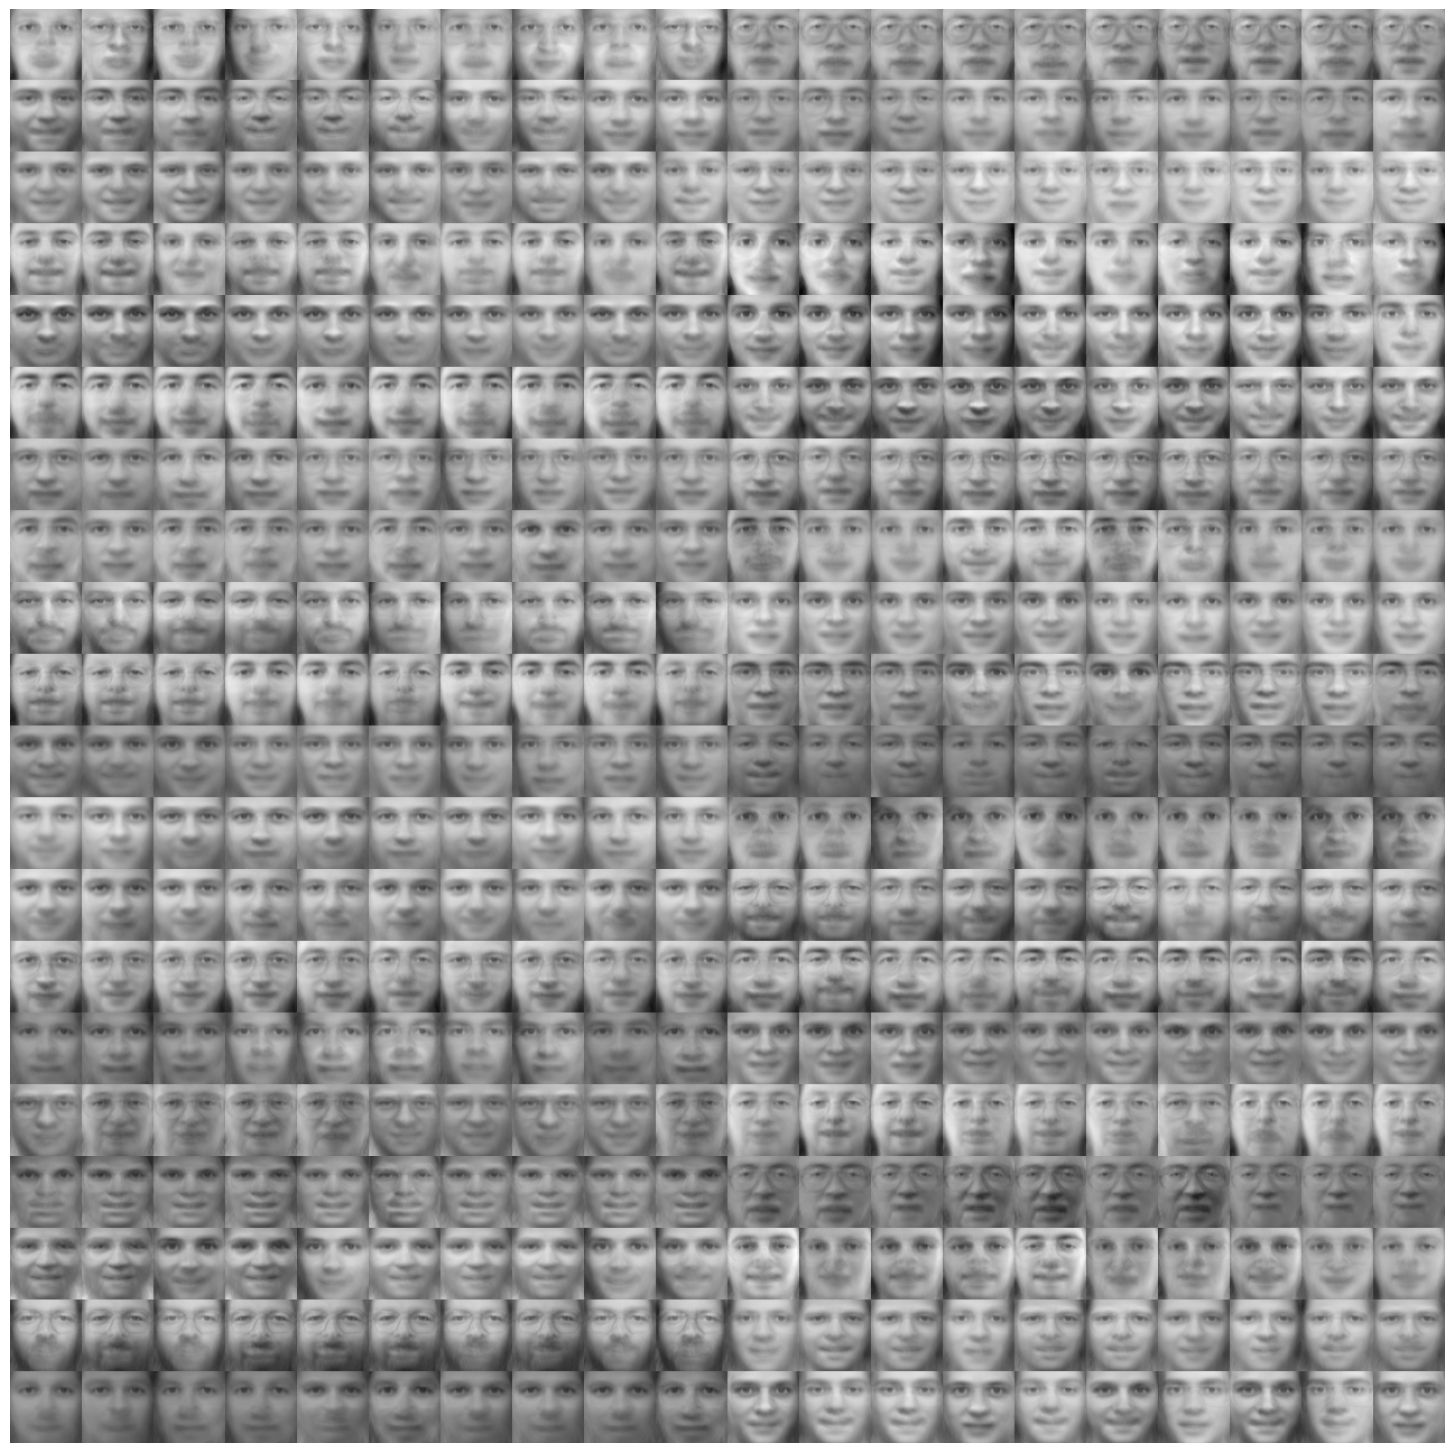

In [ ]:
# Show best rank-K approximation of image set
Xr = U[:,:K] @ np.diag(s[:K]) @ Vh[:K,:]
fig = plt.figure(figsize=(20,20), dpi=95)
plt.imshow( montage(Xr.reshape(imy,imx,n).transpose(2,1,0)) , cmap='gray')
plt.axis('off')
fig.savefig('reconstruct.jpg', bbox_inches='tight')

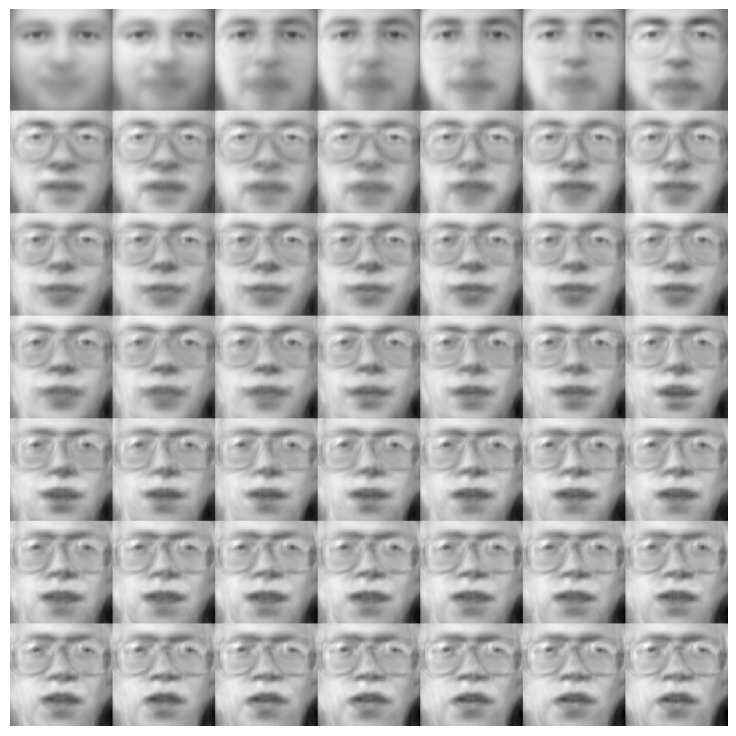

In [ ]:
# Show reconstructions of the ith image, using up to K basis vectors
i  = 13
K  = 49
Xi = np.zeros((X.shape[0], K))
Xi[:,0] = U[:,0] * s[0] * Vh[0,i]

for k in range(1, K):
    Xi[:, k] = Xi[:,k-1] + U[:,k]*s[k]*Vh[k,i]

fig = plt.figure(figsize=(10,10), dpi=95)
plt.imshow(montage(Xi.reshape(imy,imx,K).transpose(2,1,0)), cmap='gray')
plt.axis('off');